In [1]:
!pip install git+https://github.com/openai/CLIP.git
!pip install git+https://github.com/ai-forever/Kandinsky-2.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-5yswjrk2
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-5yswjrk2
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for ftfy from https://files.pythonhosted.org/packages/91/f8/dfa32d06cfcbdb76bc46e0f5d69c537de33f4cedb1a15cd4746ab45a6a26/ftfy-6.1.3-py3-none-any.whl.metadata
  Obtaining dependency information for wcwidth<0.3.0,>=0.2.12 from https://files.pythonhosted.org/packages/31/b1/a59de0ad3aabb17523a39804f4c6df3ae87ead053a4e25362ae03d73d03a/wcwidth-0.2.12-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.0 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=74cb910f15fb8d9deceabc5106c7efac694d3d00dd0a82992dca60122c85bdc6
  Stored in directory: /tmp/pip-

In [3]:
from kandinsky2 import get_kandinsky2

In [4]:
model = get_kandinsky2(
    'cuda:1',
    task_type='text2img',
    cache_dir='/tmp/kandinsky2',
    model_version='2.1',
    use_flash_attention=False
)

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:659: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


100%|████████████████████████████████████████| 890M/890M [00:04<00:00, 202MiB/s]


making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.


In [5]:
def combine(img1, img2):
    return model.mix_images(
        [img1, img2], [0.5, 0.5],
        num_steps=100,
        batch_size=1,
        guidance_scale=4,
        h=768,
        w=768,
        sampler='p_sampler',
        prior_cf_scale=2,
        prior_steps="5",
    )[0]


In [6]:
from PIL import Image
import glob

In [7]:
%mkdir /kaggle/working/GenArt

In [9]:
Dir = "/kaggle/input/arthist2/art2/"
SaveDir = "GenArt/"

  0%|          | 0/100 [00:00<?, ?it/s]

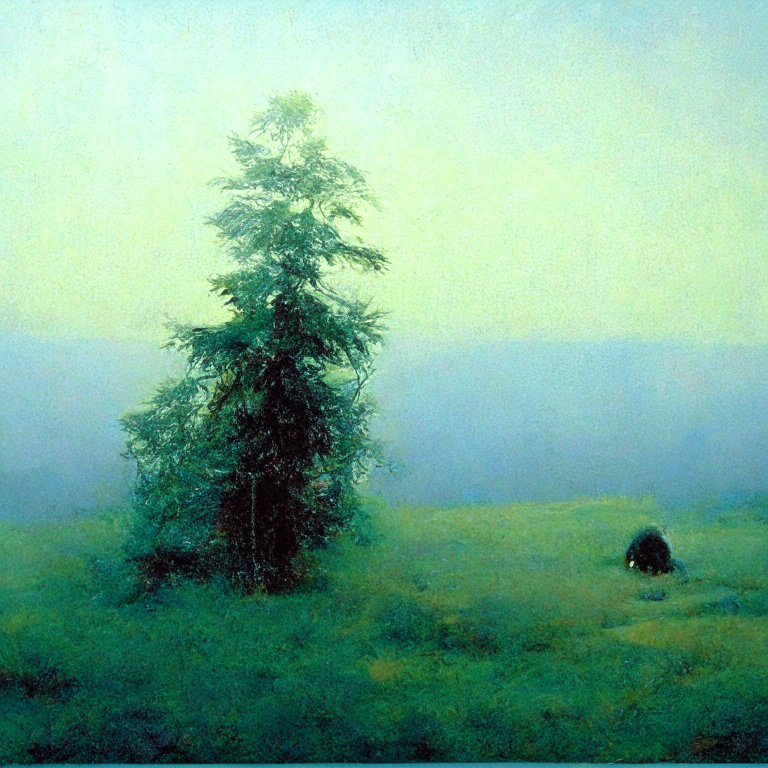

In [10]:
img1 = Image.open(Dir+"00-0.jpg")
img2 = Image.open(Dir+"06-0.jpg")
combine(img1, img2)

In [19]:
namesPic = sorted(glob.glob(Dir+"*.jpg"))

dPic = dict.fromkeys([i.split('/')[-1].removesuffix(".jpg") for i in namesPic])
for key, value in zip(dPic.keys(), [Image.open(i) for i in namesPic]):
    dPic[key] = value

len(dPic)

78

In [12]:
from random import choice

In [20]:
ind = 0
for name, pic in dPic.items(): # 78 pictures
    ch_name = choice(tuple(dPic.keys() - {name}))
    out = f"{name}+{ch_name}.jpg"
    ind += 1
    print(f"Gen {ind}: {out}")
    combine(pic, dPic[ch_name]).save(f"{SaveDir}{out}")
    

Gen 1: 00-0+02-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 2: 00-1+07-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 3: 00-2+22-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 4: 01-0+07-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 5: 01-1+19-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 6: 01-2+19-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 7: 02-0+09-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 8: 02-1+17-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 9: 02-2+23-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 10: 03-0+01-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 11: 03-1+14-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 12: 03-2+05-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 13: 04-0+23-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 14: 04-1+18-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 15: 04-2+01-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 16: 05-0+22-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 17: 05-1+12-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 18: 05-2+08-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 19: 06-0+00-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 20: 06-1+23-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 21: 06-2+07-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 22: 07-0+02-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 23: 07-1+01-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 24: 07-2+25-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 25: 08-0+05-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 26: 08-1+00-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 27: 08-2+03-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 28: 09-0+17-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 29: 09-1+21-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 30: 09-2+16-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 31: 10-0+00-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 32: 10-1+04-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 33: 10-2+06-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 34: 11-0+10-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 35: 11-1+17-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 36: 11-2+00-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 37: 12-0+11-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 38: 12-1+20-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 39: 12-2+25-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 40: 13-0+12-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 41: 13-1+19-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 42: 13-2+04-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 43: 14-0+16-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 44: 14-1+13-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 45: 14-2+10-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 46: 15-0+20-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 47: 15-1+00-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 48: 15-2+19-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 49: 16-0+07-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 50: 16-1+23-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 51: 16-2+14-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 52: 17-0+14-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 53: 17-1+08-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 54: 17-2+06-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 55: 18-0+08-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 56: 18-1+09-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 57: 18-2+06-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 58: 19-0+02-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 59: 19-1+08-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 60: 19-2+14-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 61: 20-0+02-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 62: 20-1+13-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 63: 20-2+23-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 64: 21-0+02-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 65: 21-1+01-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 66: 21-2+02-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 67: 22-0+09-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 68: 22-1+05-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 69: 22-2+10-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 70: 23-0+10-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 71: 23-1+25-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 72: 23-2+06-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 73: 24-0+07-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 74: 24-1+18-1.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 75: 24-2+15-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 76: 25-0+06-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 77: 25-1+13-0.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

Gen 78: 25-2+14-2.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# listPic[0].save(f"{SaveDir}test2.jpg")